In [12]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets

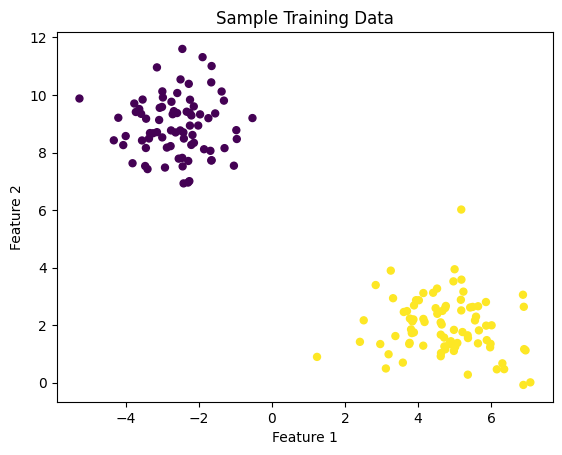

In [13]:
# Data preparation
X, y = datasets.make_blobs(
    n_samples=200, n_features=2, centers=2, cluster_std=1.05, random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Sample Training Data')
plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train, s=25)
plt.show()

In [14]:
# helper functions
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

def step_func(x):
    return np.where(x >= 0, 1, 0)

In [15]:
class Perceptron:
    def __init__(self, lr = 0.01, iters=1000):
        self.iters = iters
        self.lr = lr
        self.act_func = step_func
        self.w = None
        self.w_0 = None
    
    def fit(self, X, y):
        _, features_size = X.shape

        # initialize parameters to random values between 0 and 1
        self.w = np.random.random(features_size)
        self.w_0 = np.random.random()

        y = np.array([1 if i > 0 else 0 for i in y])

        for _ in range(self.iters):
            for idx, x_i in enumerate(X):
                # make prediction
                y_pred = self.act_func(np.dot(x_i, self.w) + self.w_0)

                # calculate update value according to perceptron rule
                update = self.lr * (y[idx] - y_pred)

                # update weights and bias (aligns hyperplane closer to misclassified examples)
                self.w += update * x_i
                self.w_0 += update
        
    def predict(self, X):
        return self.act_func(np.dot(X, self.w) + self.w_0)

Perceptron classification accuracy 1.0


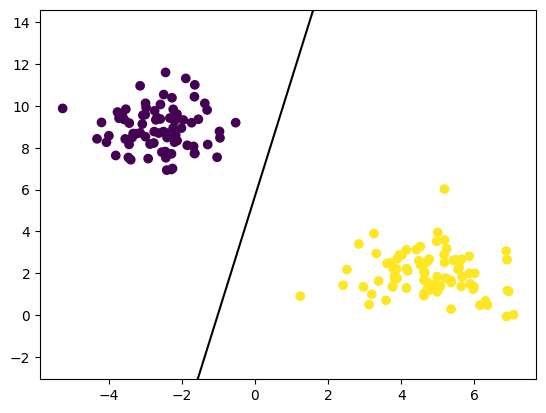

In [16]:
# classifier
clf = Perceptron()

# fit on training data and make predictions
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Perceptron classification accuracy", accuracy(y_test, y_pred))

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)

x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])

x1_1 = (-clf.w[0] * x0_1 - clf.w_0) / clf.w[1]
x1_2 = (-clf.w[0] * x0_2 - clf.w_0) / clf.w[1]

ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

ymin = np.amin(X_train[:, 1])
ymax = np.amax(X_train[:, 1])
ax.set_ylim([ymin - 3, ymax + 3])

plt.show()